# Plotting routines

For ease-of-use, standard implementations for plotting spectra have been implemented. Each :class:`HFSModel` has a method to plot to an axis, while both :class:`MultiModel` and :class:`CombinedModel` call this plotting routine for the underlying spectrum.

## Overview plotting

Considering a :class:`HFSModel`, the standard plotting routines finds out where the peaks in the spectrum are located, and samples around this area taking the FWHM into account. Take this toy example of a spectrum on a constant background:

C:\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


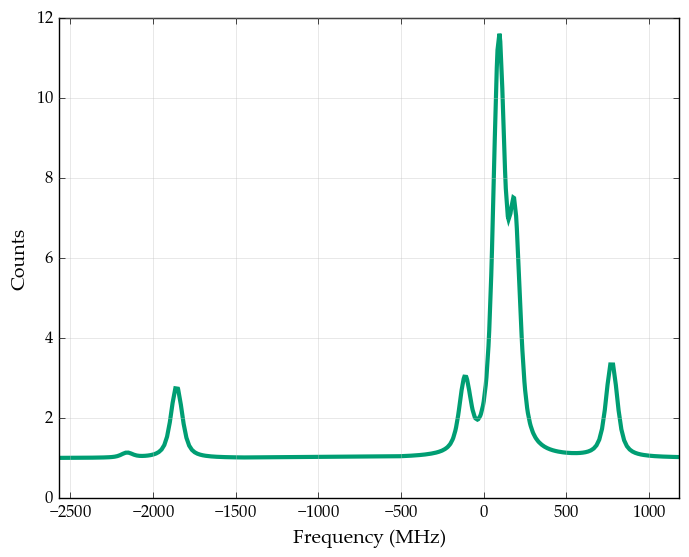

(<matplotlib.figure.Figure at 0x449d828>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb69e710>)

In [1]:
%matplotlib inline

import satlas as s
import numpy as np
np.random.seed(0)

I = 1.0
J = [1.0, 2.0]

ABC = [1000, 500, 30, 400, 0, 0]
df = 0
scale = 10
background = [1]

model = s.HFSModel(I, J, ABC, df, background_params=background, scale=scale)
model.plot(plot_kws={'distance': 5})

This provides a quick overview of the entire spectrum.

## Plotting with data

When data is available, it can be plotted alongside the spectrum.

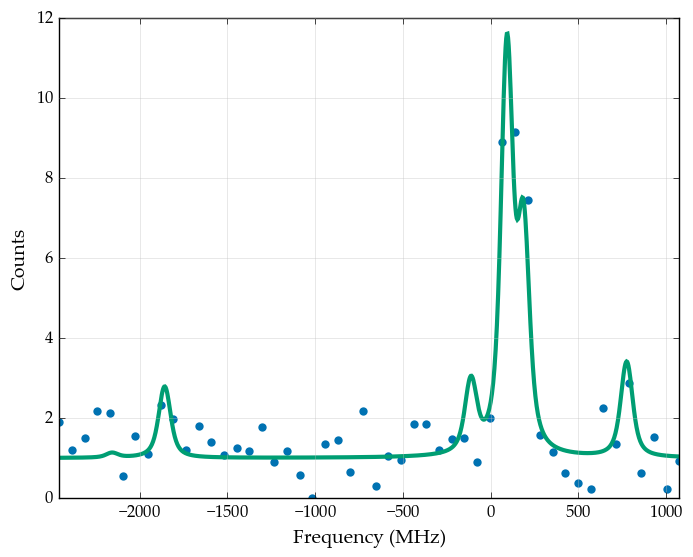

(<matplotlib.figure.Figure at 0xc0ff278>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc164c88>)

In [2]:
x = np.linspace(model.locations.min() - 300, model.locations.max() + 300, 50)
y = model(x) + 0.5*np.random.randn(x.size) * model(x)**0.5
y = np.where(y<0, 0, y)
model.plot(x=x, y=y)

Errorbars can be plotted by either supplying them in the *yerr* keyword, or by using the *plot_spectroscopic* method. this method, instead of using the symmetric errorbars provided by calculating the square root of the data point, calculate the asymmetric 68% coverage of the Poisson distribution with the mean provided by the data point. Especially at lower statistics, this is evident by the fact that the errorbars do not cross below 0 counts.

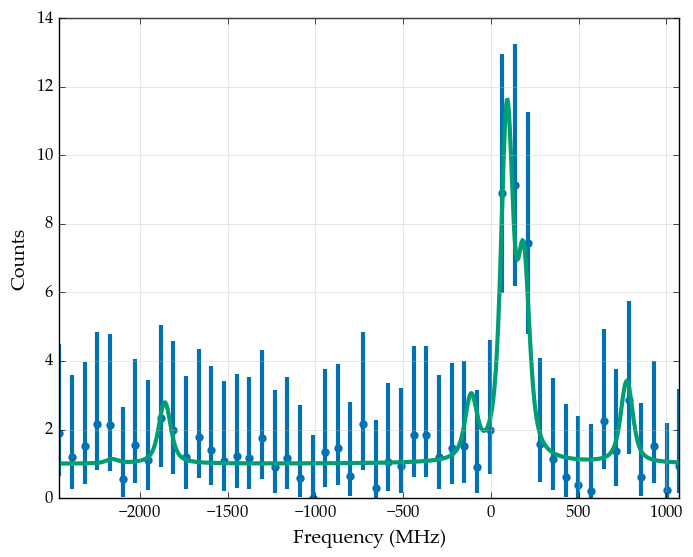

(<matplotlib.figure.Figure at 0xc150ef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd8c2d68>)

In [3]:
model.plot_spectroscopic(x=x, y=y)

## Uncertainty on model

The spectrum itself can also be displayed by showing the uncertainty on the model value, interpreting the model value as the mean of the corresponding Poisson distribution. The probability is then calculated on a 2D grid of points, and colored depending on the value of the Poisson pdf. A thin line is also drawn, representing the modelvalue and thus the mean of the distribution.

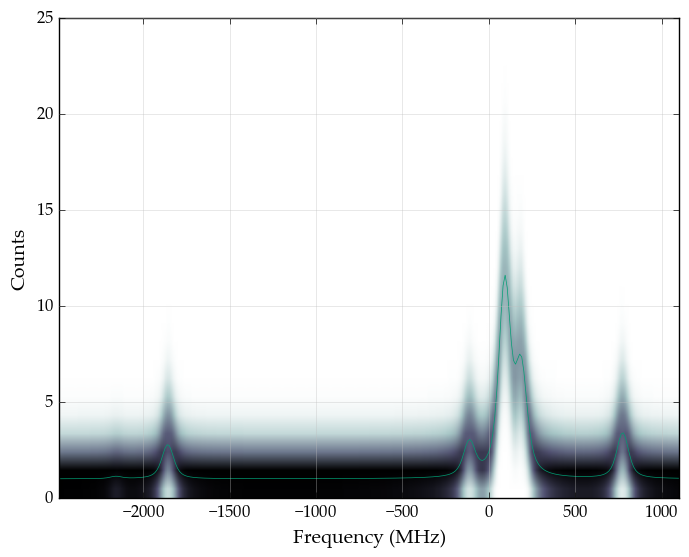

(<matplotlib.figure.Figure at 0xc1a6160>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc1afa58>)

In [4]:
model.plot(plot_kws={'model': True})

This plot can be displayed in each colormap provided by matplotlib by specifying the colormap as a string.

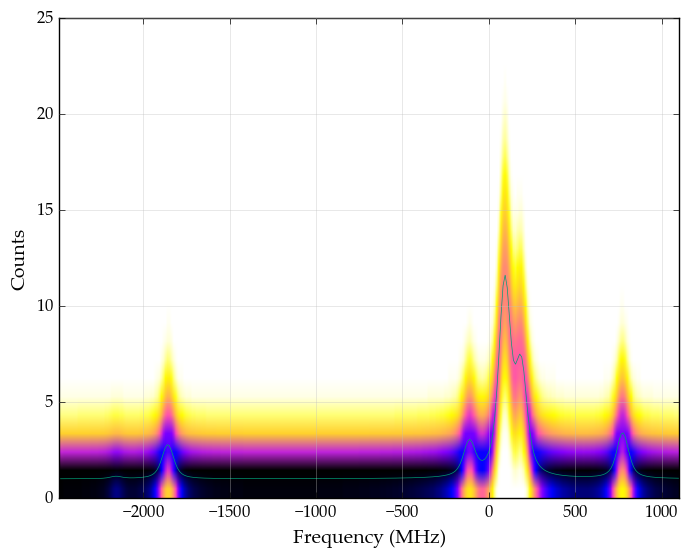

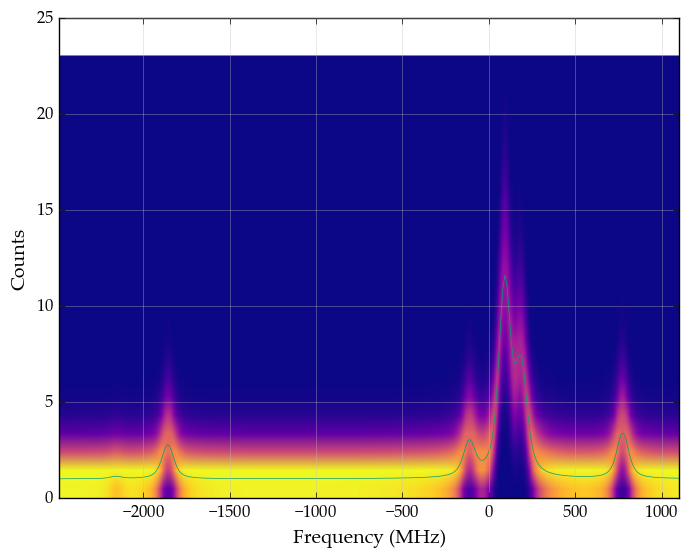

(<matplotlib.figure.Figure at 0xd4a9860>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd892e48>)

In [5]:
model.plot(plot_kws={'model': True, 'colormap': 'gnuplot2_r'})
model.plot(plot_kws={'model': True, 'colormap': 'plasma'})

The data can also be plotted on top of this imagemap.

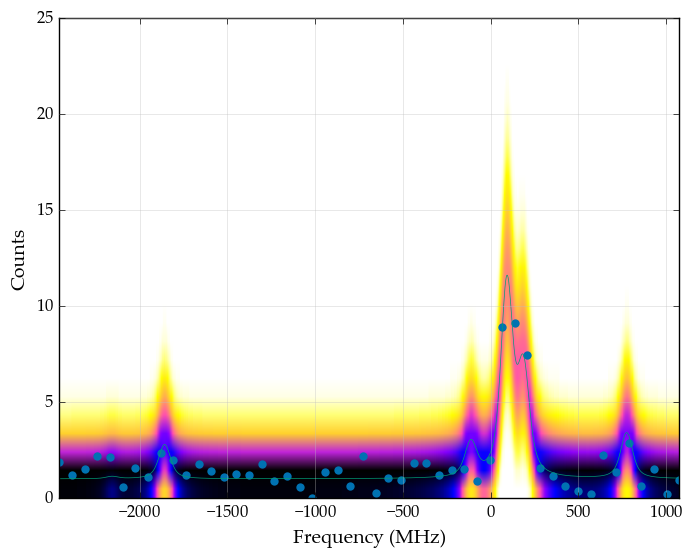

(<matplotlib.figure.Figure at 0xd919fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbc00978>)

In [6]:
model.plot(x=x, y=y, plot_kws={'model': True, 'colormap': 'gnuplot2_r'})